In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='RealEstate_Trading')
df1

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,Real Estate,DLF,Construction - Residential & Commercial Complexes,2023-12-20,675.35,704.00,704.00,671.70,3091436,-0.0325
1,Real Estate,DLF,Construction - Residential & Commercial Complexes,2023-12-19,698.05,699.00,702.10,691.95,1475227,0.0014
2,Real Estate,DLF,Construction - Residential & Commercial Complexes,2023-12-18,697.10,702.45,705.85,693.45,1906529,-0.0116
3,Real Estate,DLF,Construction - Residential & Commercial Complexes,2023-12-15,705.30,700.00,709.00,695.00,4137143,0.0083
4,Real Estate,DLF,Construction - Residential & Commercial Complexes,2023-12-14,699.50,681.70,701.95,681.05,7464762,0.0382
...,...,...,...,...,...,...,...,...,...,...
14159,Trading,Uniphos Enterprises Ltd,Trading,2019-01-07,96.35,97.35,97.35,95.15,951,0.0078
14160,Trading,Uniphos Enterprises Ltd,Trading,2019-01-04,95.60,96.40,97.60,94.00,1778,0.0165
14161,Trading,Uniphos Enterprises Ltd,Trading,2019-01-03,94.05,95.65,96.70,93.10,6771,-0.0152
14162,Trading,Uniphos Enterprises Ltd,Trading,2019-01-02,95.50,95.30,97.40,94.40,3694,-0.0047


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14164 entries, 0 to 14163
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   14164 non-null  object        
 1   Company    14164 non-null  object        
 2   Industry   14164 non-null  object        
 3   DATE       14164 non-null  datetime64[ns]
 4   PRICE      14164 non-null  float64       
 5   OPEN       14164 non-null  float64       
 6   HIGH       14164 non-null  float64       
 7   LOW        14164 non-null  float64       
 8   VOLUME     14164 non-null  int64         
 9   CHANGE(%)  14164 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
df1.isnull().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

<Axes: >

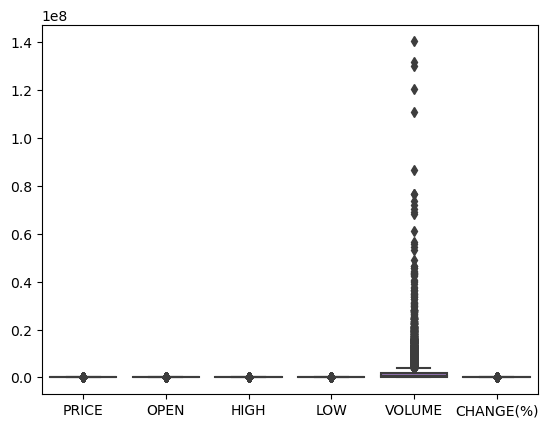

In [7]:
sns.boxplot(data=df1)

df1['DATE'] = pd.to_datetime(df1['DATE'])

# Correcting the incomplete line in the dataset
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Group by 'Company' and apply the remove_outliers function to numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df_outliers_removed = df1.groupby('Company')[numerical_columns].apply(lambda x: x.apply(remove_outliers))

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_outliers_removed)
plt.title('Boxplots of Numerical Columns After Removing Outliers by Company')
plt.show()

df1['DATE'] = pd.to_datetime(df1['DATE'])

df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(column):
    Q1, Q3 = column.quantile(q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(min(x, upper), lower))

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


In [8]:
df1.isna().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

In [9]:
df1.dropna(inplace=True)

In [10]:
df2=df1.copy()

df2 = df2.sort_values(by='DATE')

# Calculate daily returns for each stock
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return
14163,Trading,Uniphos Enterprises Ltd,Trading,2019-01-01,95.95,97.15,98.80,95.20,1318,-0.0129,NaN
9294,Trading,Sundram Fasteners Ltd,Trading,2019-01-01,544.60,535.00,546.65,530.65,74793,0.0181,NaN
5595,Real Estate,Prestige Estate,Construction - Residential & Commercial Complexes,2019-01-01,235.70,221.00,240.95,220.30,1267018,0.0719,NaN
4362,Real Estate,Oberoi Reality,Construction - Residential & Commercial Complexes,2019-01-01,454.70,444.90,457.90,442.25,312694,0.0314,NaN
6828,Real Estate,Phoenix Mills,Construction - Residential & Commercial Complexes,2019-01-01,576.45,561.20,578.90,560.50,6667,0.0228,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8062,Trading,Sundram Fasteners Ltd,Trading,2023-12-20,1248.40,1242.90,1258.90,1221.30,63950,0.0050,0.005032
11761,Trading,MSTC Ltd,Trading,2023-12-20,507.40,514.00,567.65,494.40,4029620,-0.0091,-0.009081
9295,Trading,Redington Ltd,Trading,2023-12-20,173.65,175.60,177.00,170.80,2121243,-0.0100,-0.009977
1233,Real Estate,Macrotech Dev,Construction - Residential & Commercial Complexes,2023-12-20,918.70,925.00,936.20,893.65,775169,-0.0024,-0.002389


In [11]:

df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate additional features
df2['MA_10'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=10).mean())
df2['MA_50'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=30).mean())
df2.head(20)


,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
8061,Trading,Adani Enterprises Ltd,Trading,2019-01-01,157.25,160.90,162.35,155.45,4726656,-0.0233,NaN,NaN,NaN
8038,Trading,Adani Enterprises Ltd,Trading,2019-01-02,143.00,136.95,144.80,134.55,7091209,0.0427,-0.090620,NaN,NaN
8018,Trading,Adani Enterprises Ltd,Trading,2019-01-03,133.85,130.35,135.20,128.85,7738116,0.0388,-0.063986,NaN,NaN
7999,Trading,Adani Enterprises Ltd,Trading,2019-01-04,151.45,147.45,153.20,145.10,7938713,0.0320,0.131490,NaN,NaN
7939,Trading,Adani Enterprises Ltd,Trading,2019-01-07,154.10,150.65,155.60,148.05,6182608,0.0239,0.017498,NaN,NaN
7916,Trading,Adani Enterprises Ltd,Trading,2019-01-08,125.45,128.60,129.10,123.00,4462938,-0.0260,-0.185918,NaN,NaN
7877,Trading,Adani Enterprises Ltd,Trading,2019-01-10,143.65,146.10,147.70,140.50,3732047,-0.0151,0.145078,NaN,NaN
7857,Trading,Adani Enterprises Ltd,Trading,2019-01-11,200.45,199.00,202.40,196.20,3522957,0.0040,0.395405,NaN,NaN
8052,Trading,Adani Enterprises Ltd,Trading,2019-01-14,148.35,151.00,151.15,147.00,2624582,-0.0208,-0.259915,NaN,NaN
8051,Trading,Adani Enterprises Ltd,Trading,2019-01-15,148.65,148.50,149.95,147.25,1805678,0.0020,0.002022,150.620,NaN


In [12]:
df2.tail(10)

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
12941,Trading,Uniphos Enterprises Ltd,Trading,2023-12-07,157.45,158.20,158.30,155.50,8403,0.0003,0.000318,154.165,152.761667
12940,Trading,Uniphos Enterprises Ltd,Trading,2023-12-08,152.10,158.30,158.50,151.90,10914,-0.0340,-0.033979,153.950,152.628333
12939,Trading,Uniphos Enterprises Ltd,Trading,2023-12-11,155.70,152.90,156.90,152.90,8369,0.0237,0.023669,154.030,152.546667
12938,Trading,Uniphos Enterprises Ltd,Trading,2023-12-12,153.50,157.85,158.50,151.65,6786,-0.0141,-0.014130,154.190,152.490000
12937,Trading,Uniphos Enterprises Ltd,Trading,2023-12-13,154.95,154.50,156.00,152.50,16504,0.0094,0.009446,154.395,152.461667
12936,Trading,Uniphos Enterprises Ltd,Trading,2023-12-14,155.60,156.45,158.00,155.00,12420,0.0042,0.004195,154.800,152.545000
12935,Trading,Uniphos Enterprises Ltd,Trading,2023-12-15,160.90,157.95,164.50,155.15,31211,0.0341,0.034062,155.690,152.825000
12934,Trading,Uniphos Enterprises Ltd,Trading,2023-12-18,163.50,162.50,169.35,161.85,27746,0.0162,0.016159,156.700,153.190000
12933,Trading,Uniphos Enterprises Ltd,Trading,2023-12-19,161.10,164.30,166.35,160.30,13669,-0.0147,-0.014679,157.220,153.483333
12932,Trading,Uniphos Enterprises Ltd,Trading,2023-12-20,154.10,163.35,163.35,152.15,8056,-0.0435,-0.043451,156.890,153.536667


In [13]:
# Calculate volatility (using a rolling standard deviation for the last 10 days)
df2['Volatility'] = df2.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=10).std())
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility
8061,Trading,Adani Enterprises Ltd,Trading,2019-01-01,157.25,160.90,162.35,155.45,4726656,-0.0233,NaN,NaN,NaN,NaN
8038,Trading,Adani Enterprises Ltd,Trading,2019-01-02,143.00,136.95,144.80,134.55,7091209,0.0427,-0.090620,NaN,NaN,NaN
8018,Trading,Adani Enterprises Ltd,Trading,2019-01-03,133.85,130.35,135.20,128.85,7738116,0.0388,-0.063986,NaN,NaN,NaN
7999,Trading,Adani Enterprises Ltd,Trading,2019-01-04,151.45,147.45,153.20,145.10,7938713,0.0320,0.131490,NaN,NaN,NaN
7939,Trading,Adani Enterprises Ltd,Trading,2019-01-07,154.10,150.65,155.60,148.05,6182608,0.0239,0.017498,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,Trading,Uniphos Enterprises Ltd,Trading,2023-12-14,155.60,156.45,158.00,155.00,12420,0.0042,0.004195,154.80,152.545000,0.016319
12935,Trading,Uniphos Enterprises Ltd,Trading,2023-12-15,160.90,157.95,164.50,155.15,31211,0.0341,0.034062,155.69,152.825000,0.019090
12934,Trading,Uniphos Enterprises Ltd,Trading,2023-12-18,163.50,162.50,169.35,161.85,27746,0.0162,0.016159,156.70,153.190000,0.019350
12933,Trading,Uniphos Enterprises Ltd,Trading,2023-12-19,161.10,164.30,166.35,160.30,13669,-0.0147,-0.014679,157.22,153.483333,0.020084


In [14]:
summary_stats = df2.groupby(['Company']).describe()
summary_stats
# Display the summary statistics

PRICE                                              \
                          count         mean          std     min       25%   
Company                                                                       
Adani Enterprises Ltd    1233.0  1332.962814  1136.652940  116.95  197.7000   
DLF                      1233.0   304.314234   126.835176  120.80  181.3500   
Godrej Pro               1233.0  1264.435118   390.888330  560.00  925.4500   
MMTC Ltd                 1233.0    33.401014    13.318226   10.60   20.4500   
MSTC Ltd                 1171.0   245.481469   107.362762   75.15  146.4250   
Macrotech Dev             664.0   557.598825   137.561040  251.55  480.0925   
Oberoi Reality           1233.0   711.919870   253.986817  292.90  515.5000   
Phoenix Mills            1233.0  1000.538240   413.893379  484.40  657.0000   
Prestige Estate          1233.0   380.266788   159.830241  134.85  269.0500   
Redington Ltd            1233.0   108.494655    52.521314   31.15   55.5800   
Sundram Fasteners Ltd    1233.0   730.483577   274.159699  250.85  487.5000   
Uniphos Enterprises Ltd  1232.0   107.722403    36.594411   32.50   69.2875   

                                                         OPEN               \
                              50%        75%      max   count         mean   
Company                                                                      
Adani Enterprises Ltd    1414.800  2203.1000  4165.30  1233.0  1334.679197   
DLF                       309.000   386.3500   705.30  1233.0   304.421898   
Godrej Pro               1260.250  1514.1500  2502.80  1233.0  1265.716951   
MMTC Ltd                   32.150    43.2000    87.10  1233.0    33.477616   
MSTC Ltd                  265.850   314.8500   513.05  1171.0   245.936208   
Macrotech Dev             532.715   637.6125   940.85   664.0   558.094593   
Oberoi Reality            650.050   910.1500  1489.35  1233.0   712.226764   
Phoenix Mills             859.200  1317.4500  2389.90  1233.0  1001.015572   
Prestige Estate           348.350   461.5500  1186.45  1233.0   380.467113   
Redington Ltd             123.850   155.6000   199.40  1233.0   108.759570   
Sundram Fasteners Ltd     744.000   914.6500  1316.85  1233.0   731.246959   
Uniphos Enterprises Ltd   117.250   135.5500   178.65  1232.0   108.253044   

                         ...        MA_50              Volatility            \
                         ...          75%          max      count      mean   
Company                  ...                                                  
Adani Enterprises Ltd    ...  2356.145833  3656.193333     1223.0  0.181441   
DLF                      ...   380.003750   601.016667     1223.0  0.106085   
Godrej Pro               ...  1525.910417  2149.721667     1223.0  0.109954   
MMTC Ltd                 ...    43.368750    55.966667     1223.0  0.132735   
MSTC Ltd                 ...   315.565833   429.258333     1161.0  0.129378   
Macrotech Dev            ...   594.745833   819.318667      654.0  0.120460   
Oberoi Reality           ...   907.215417  1282.381667     1223.0  0.091816   
Phoenix Mills            ...  1286.566250  2079.943333     1223.0  0.087586   
Prestige Estate          ...   459.281250   872.453333     1223.0  0.118976   
Redington Ltd            ...   151.915417   181.873333     1223.0  0.106081   
Sundram Fasteners Ltd    ...   871.347500  1237.781667     1223.0  0.080613   
Uniphos Enterprises Ltd  ...   134.705000   168.610000     1222.0  0.026961   

                                                                           \
                              std       min       25%       50%       75%   
Company                                                                     
Adani Enterprises Ltd    0.115516  0.007960  0.089698  0.180048  0.257564   
DLF                      0.060684  0.007786  0.059938  0.100074  0.144529   
Godrej Pro               0.067190  0.007240  0.055707  0.103319  0.154901   
MMTC Ltd             

Text(0.5, 1.0, 'Distribution of Daily Returns')

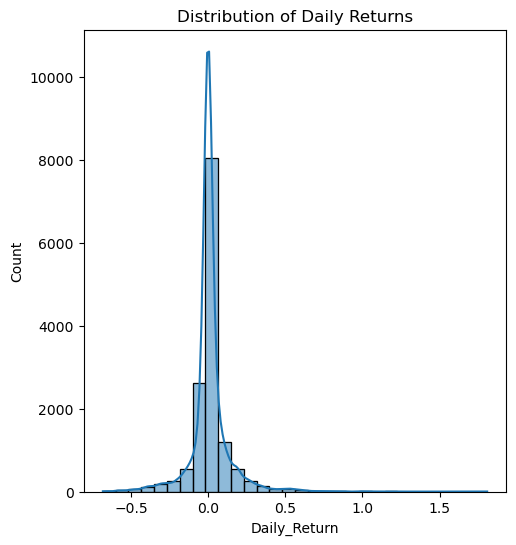

In [15]:
df2 = df2.sort_values(by=['Company', 'DATE'])

# Plot histograms for returns and trading volumes
plt.figure(figsize=(12, 6))

# Histogram for Daily Returns
plt.subplot(1, 2, 1)
sns.histplot(df2['Daily_Return'], bins=30, kde=True)
plt.title('Distribution of Daily Returns')

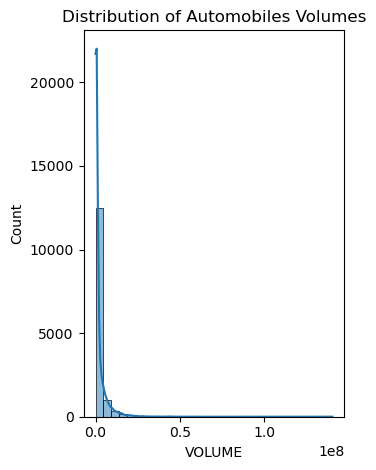

In [16]:
# Histogram for Trading Volumes
plt.subplot(1, 2, 2)
sns.histplot(df2['VOLUME'], bins=30, kde=True)
plt.title('Distribution of Automobiles Volumes')

plt.tight_layout()
plt.show()

In [17]:
correlation_matrix = df2.groupby('Company')[['Daily_Return', 'VOLUME']].corr()
correlation_matrix

Daily_Return    VOLUME
Company                                                     
Adani Enterprises Ltd   Daily_Return      1.000000  0.069221
                        VOLUME            0.069221  1.000000
DLF                     Daily_Return      1.000000  0.044699
                        VOLUME            0.044699  1.000000
Godrej Pro              Daily_Return      1.000000  0.133664
                        VOLUME            0.133664  1.000000
MMTC Ltd                Daily_Return      1.000000  0.333329
                        VOLUME            0.333329  1.000000
MSTC Ltd                Daily_Return      1.000000  0.279421
                        VOLUME            0.279421  1.000000
Macrotech Dev           Daily_Return      1.000000  0.037529
                        VOLUME            0.037529  1.000000
Oberoi Reality          Daily_Return      1.000000  0.175711
                        VOLUME            0.175711  1.000000
Phoenix Mills           Daily_Return      1.000000  0.007236
                        VOLUME            0.007236  1.000000
Prestige Estate         Daily_Return      1.000000  0.151285
                        VOLUME            0.151285  1.000000
Redington Ltd           Daily_Return      1.000000  0.121702
                        VOLUME            0.121702  1.000000
Sundram Fasteners Ltd   Daily_Return      1.000000  0.051750
                        VOLUME            0.051750  1.000000
Uniphos Enterprises Ltd Daily_Return      1.000000  0.314959
                        VOLUME            0.314959  1.000000

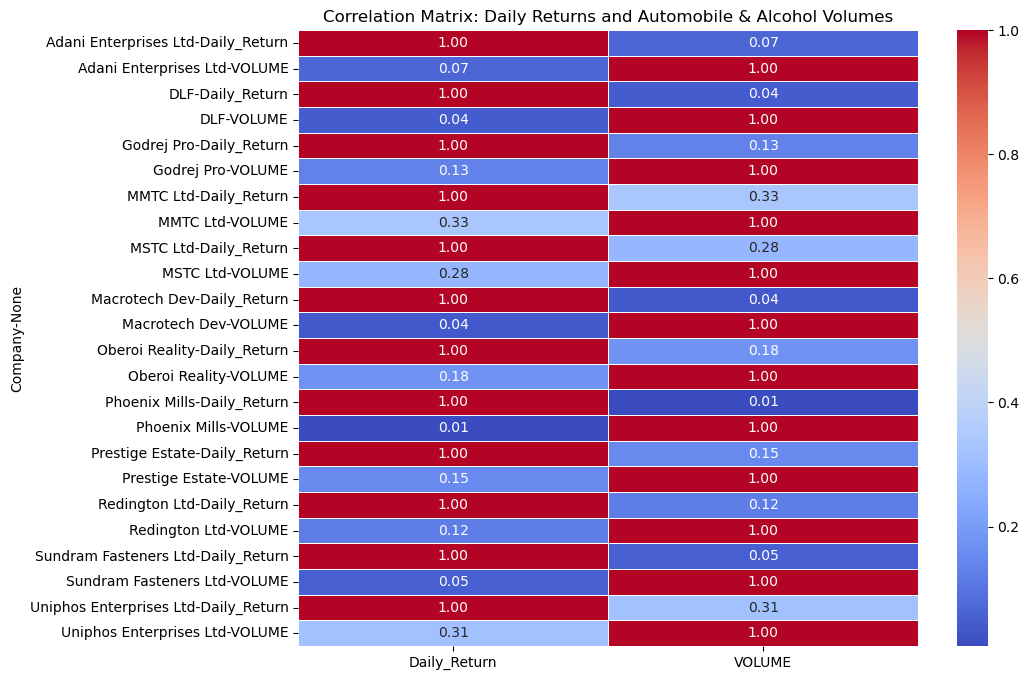

In [18]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns and Automobile & Alcohol Volumes')
plt.show()

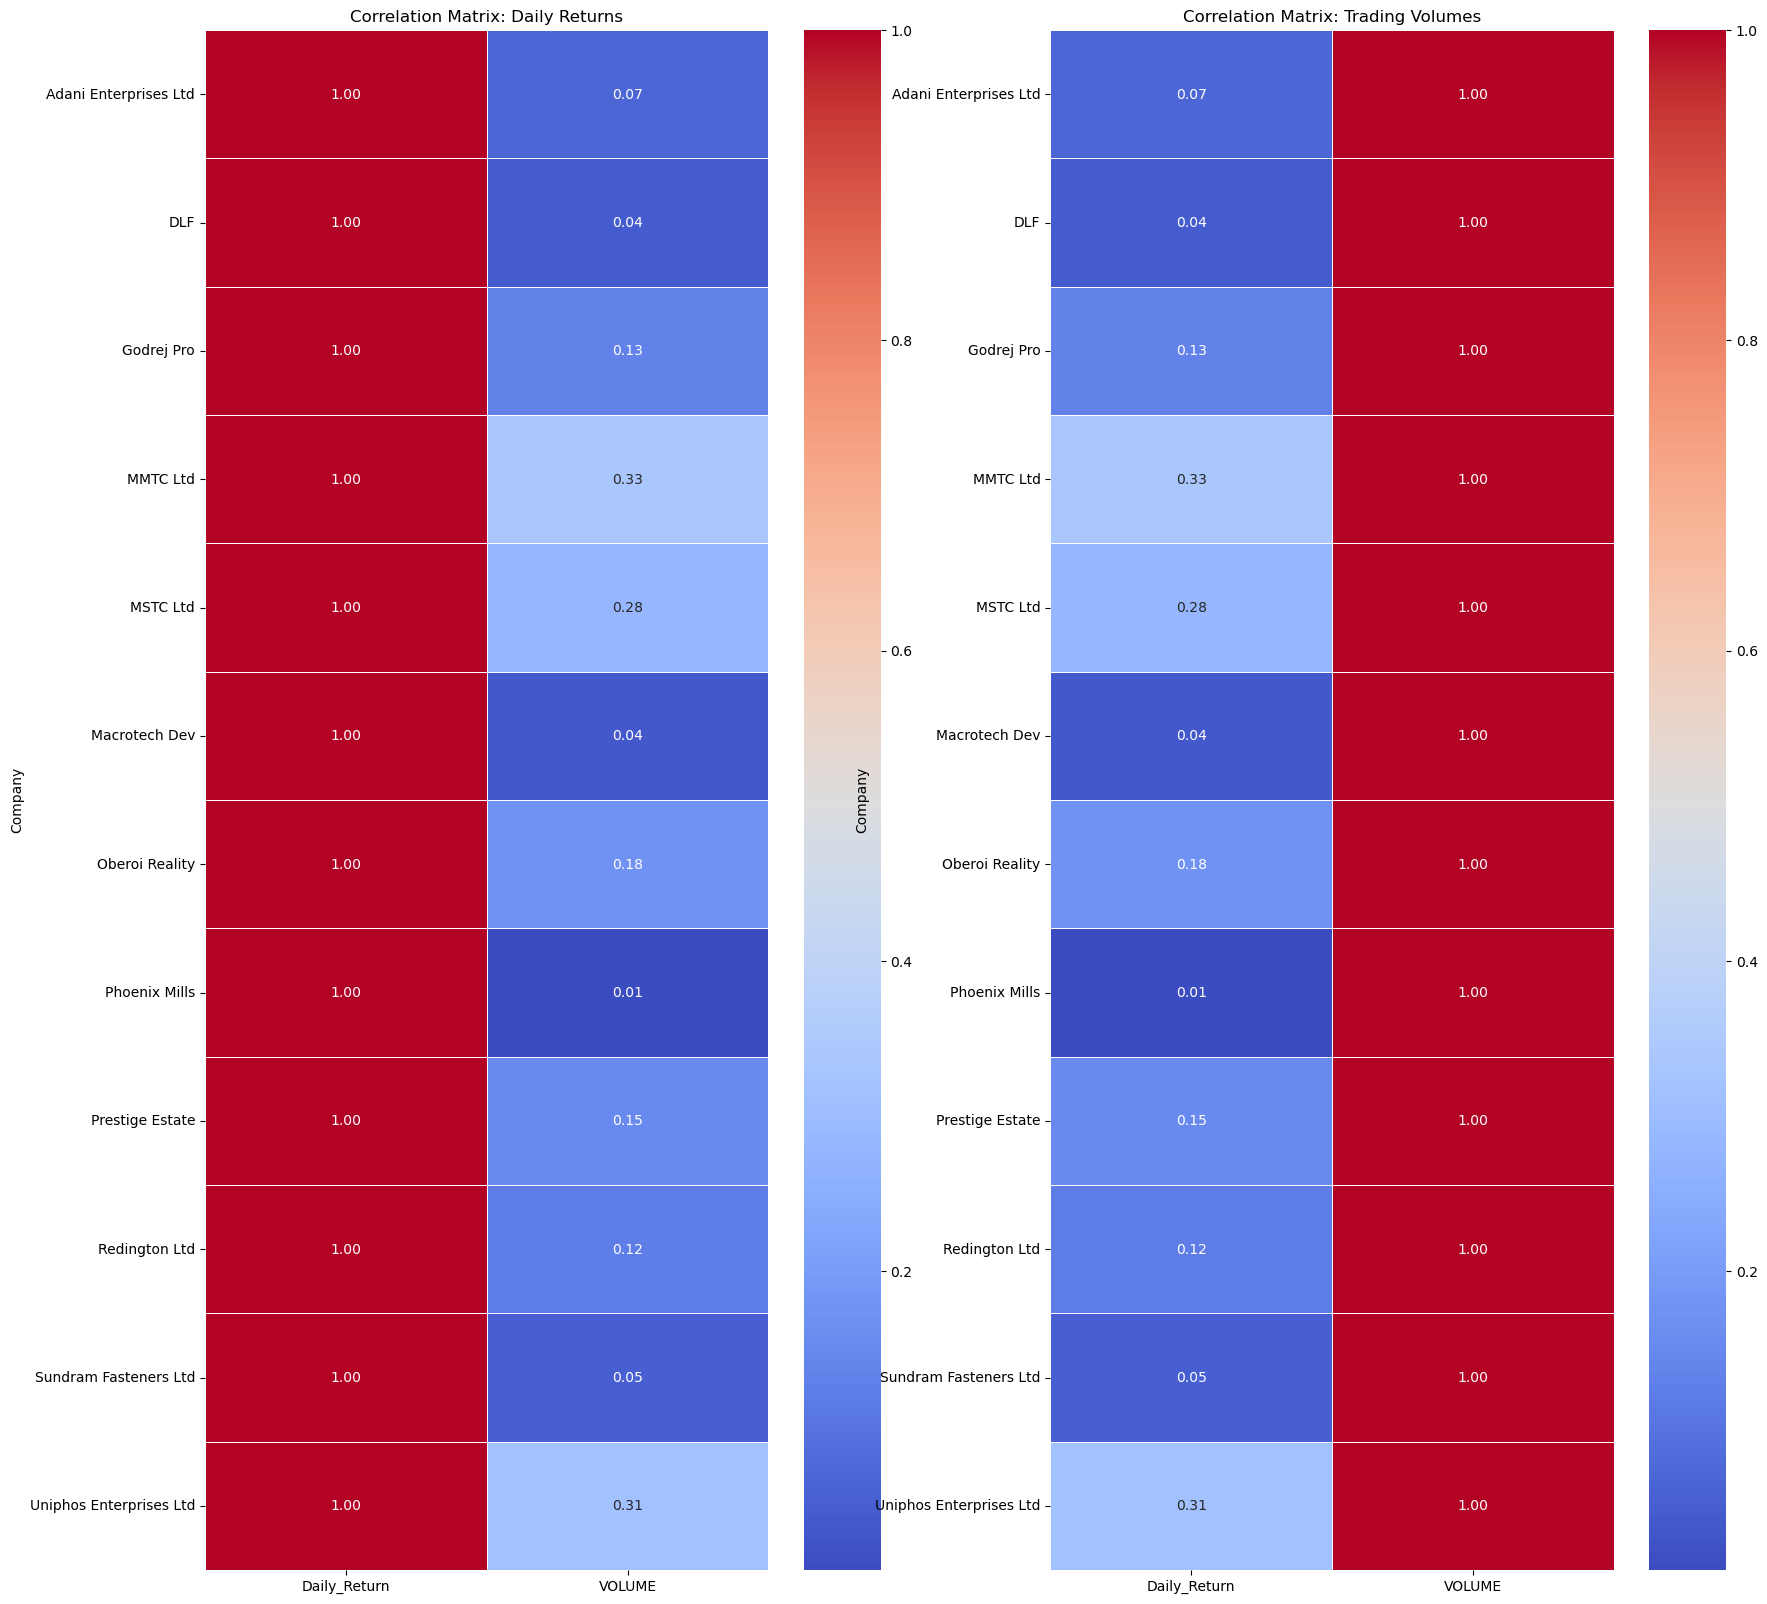

In [19]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Sort the DataFrame by 'DATE' in ascending order
df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate the correlation matrix
correlation_matrix = df2.groupby(['Company'])[['Daily_Return', 'VOLUME']].corr().unstack()

# Visualize the correlation matrices
plt.figure(figsize=(20, 20))

# Correlation matrix for Daily Returns
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix['Daily_Return'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns')

# Correlation matrix for Trading Volumes
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix['VOLUME'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Trading Volumes')

#plt.tight_layout()
plt.show()


In [20]:
grouped_df = df2.groupby('Company')
grouped_df['Daily_Return'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Adani Enterprises Ltd,1232.0,0.024279,0.208260,-0.684036,-0.020446,0.004518,0.049031,1.808923
DLF,1232.0,0.007968,0.117660,-0.424855,-0.023921,0.003017,0.033184,0.784285
Godrej Pro,1232.0,0.008348,0.124378,-0.465663,-0.022305,0.001519,0.032891,0.821799
MMTC Ltd,1232.0,0.010674,0.150669,-0.510815,-0.035963,-0.005610,0.028420,1.045455
MSTC Ltd,1170.0,0.011364,0.147664,-0.540506,-0.033141,-0.003253,0.034682,1.002515
Macrotech Dev,663.0,0.012220,0.137871,-0.585346,-0.022677,0.004095,0.042945,0.547737
Oberoi Reality,1232.0,0.006434,0.103229,-0.455012,-0.019983,0.002526,0.032653,0.628636
Phoenix Mills,1232.0,0.006233,0.099267,-0.451751,-0.017343,0.002918,0.032495,0.642490
Prestige Estate,1232.0,0.011435,0.140878,-0.593945,-0.021338,0.003089,0.040626,1.158666


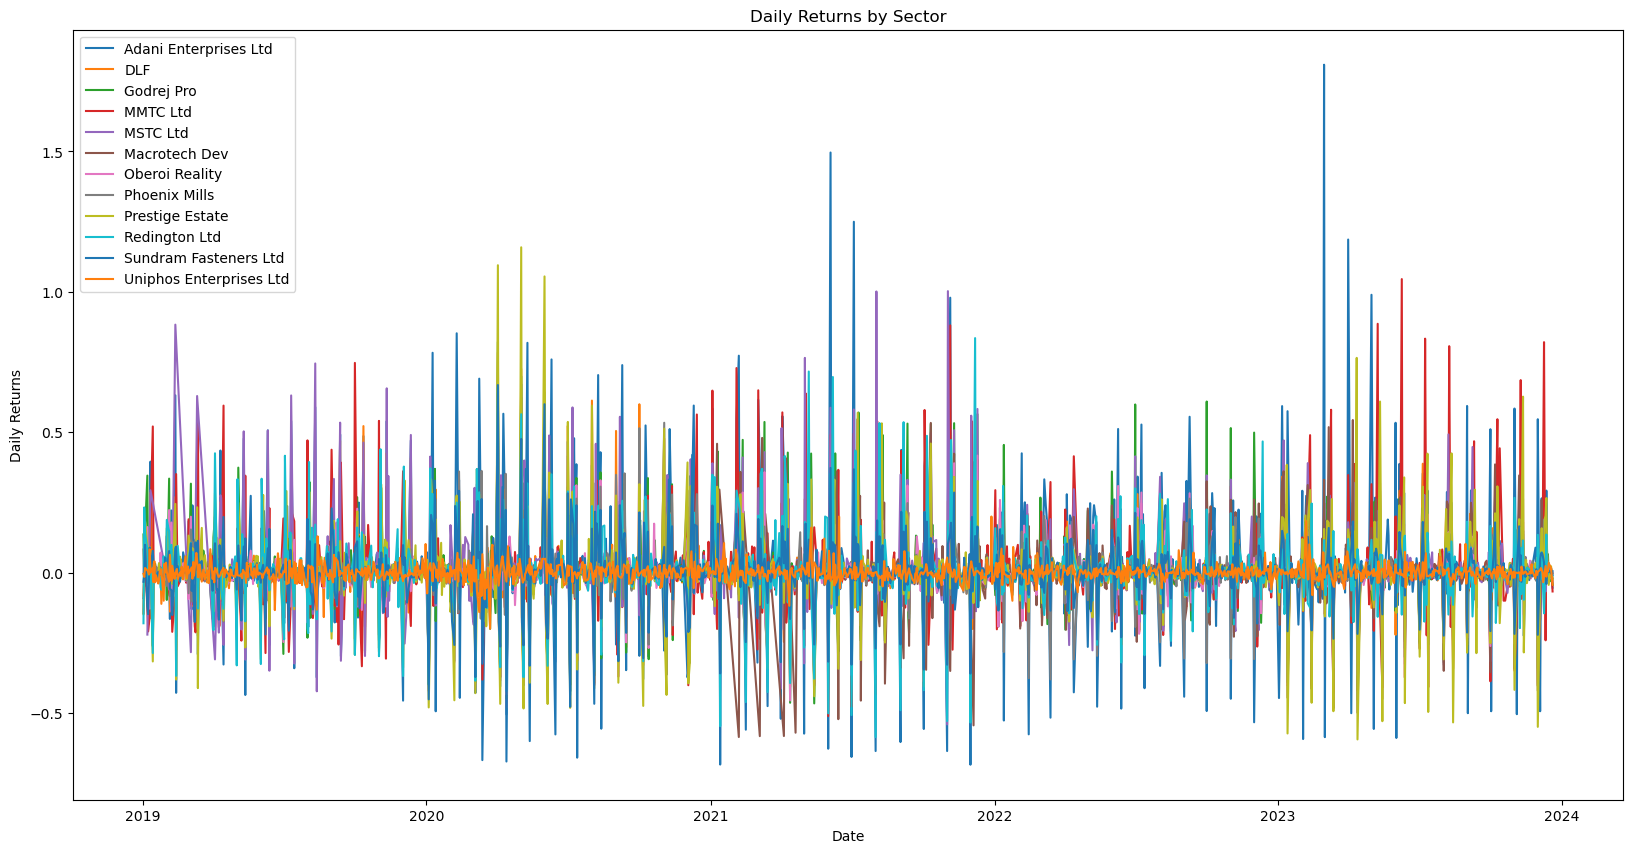

In [22]:
# Example: Line chart
plt.figure(figsize=(20, 10))
for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name)

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


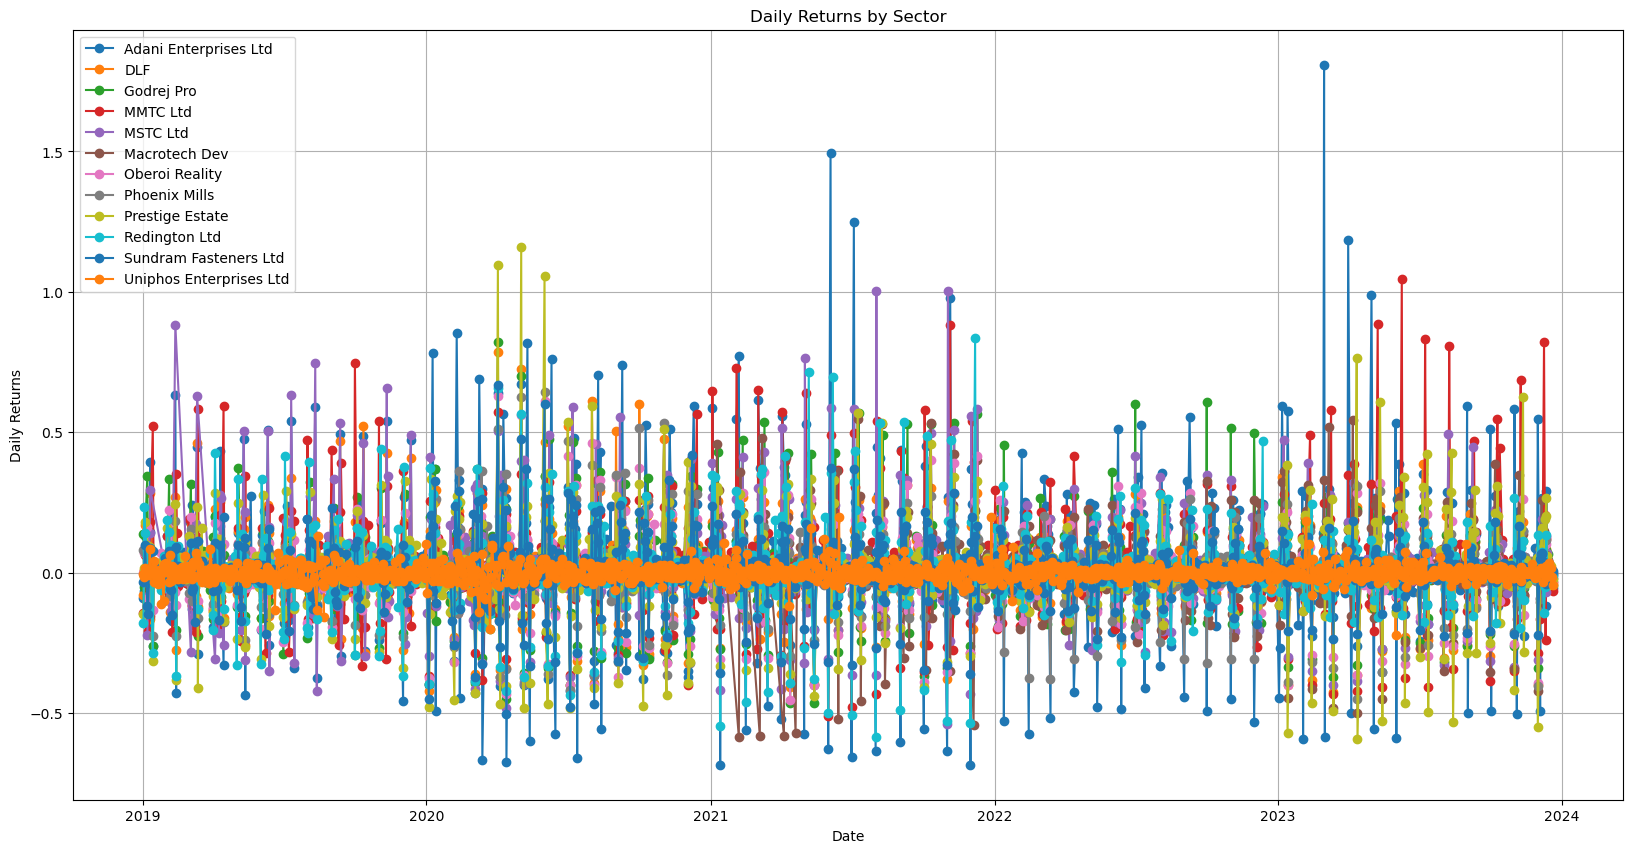

In [23]:


plt.figure(figsize=(20, 10))

for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


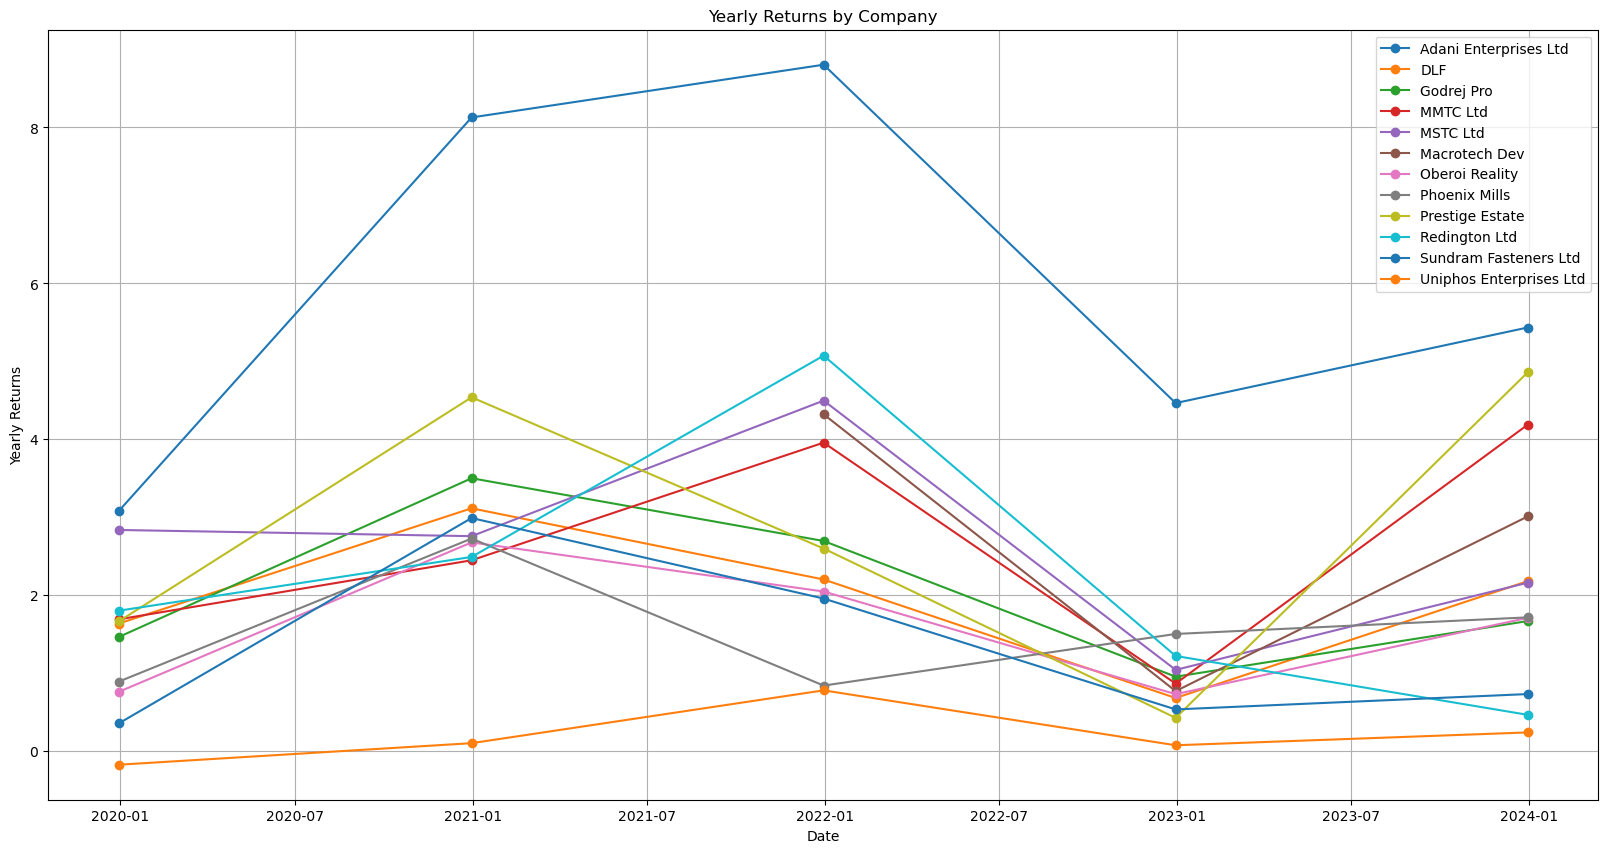

In [24]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate yearly returns
df2_yearly = df2.set_index('DATE').groupby(['Company', pd.Grouper(freq='Y')])['Daily_Return'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

for name, group in df2_yearly.groupby('Company'):
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Yearly Returns by Company')
plt.xlabel('Date')
plt.ylabel('Yearly Returns')
plt.legend()
plt.grid(True)
plt.show()


D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


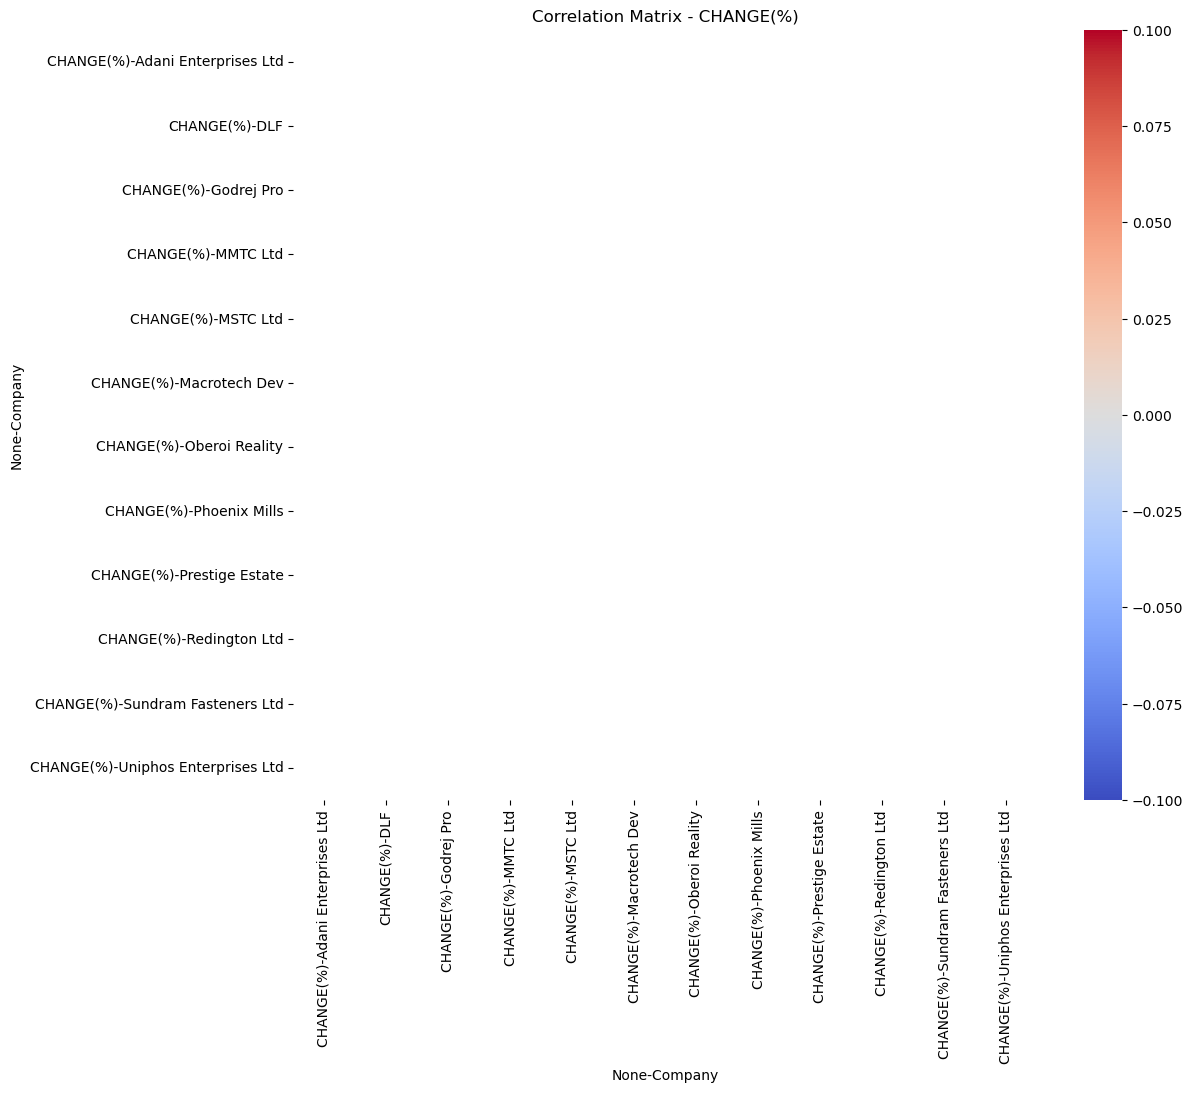

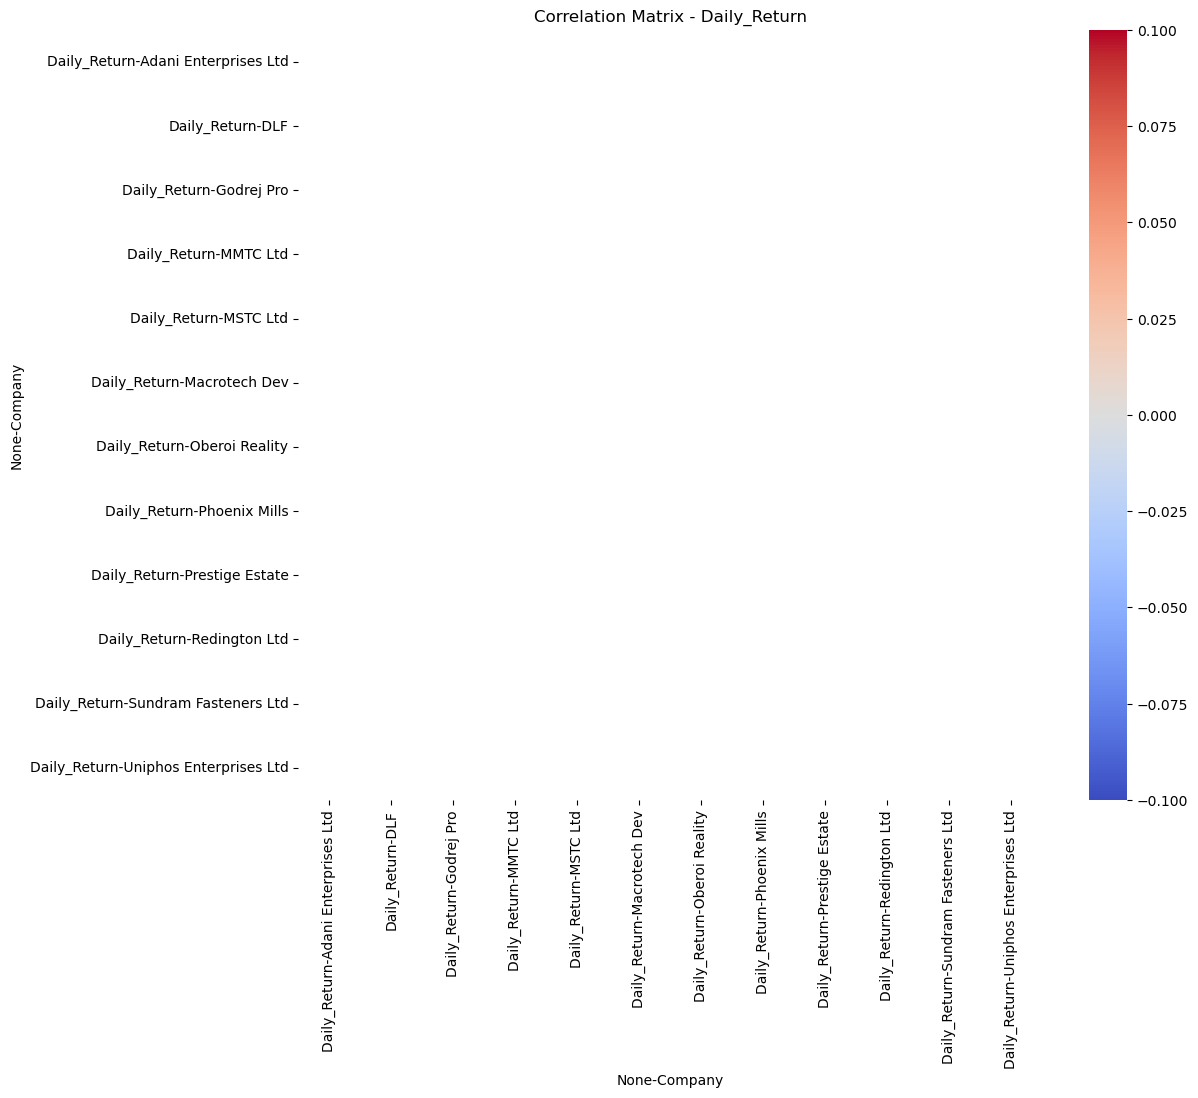

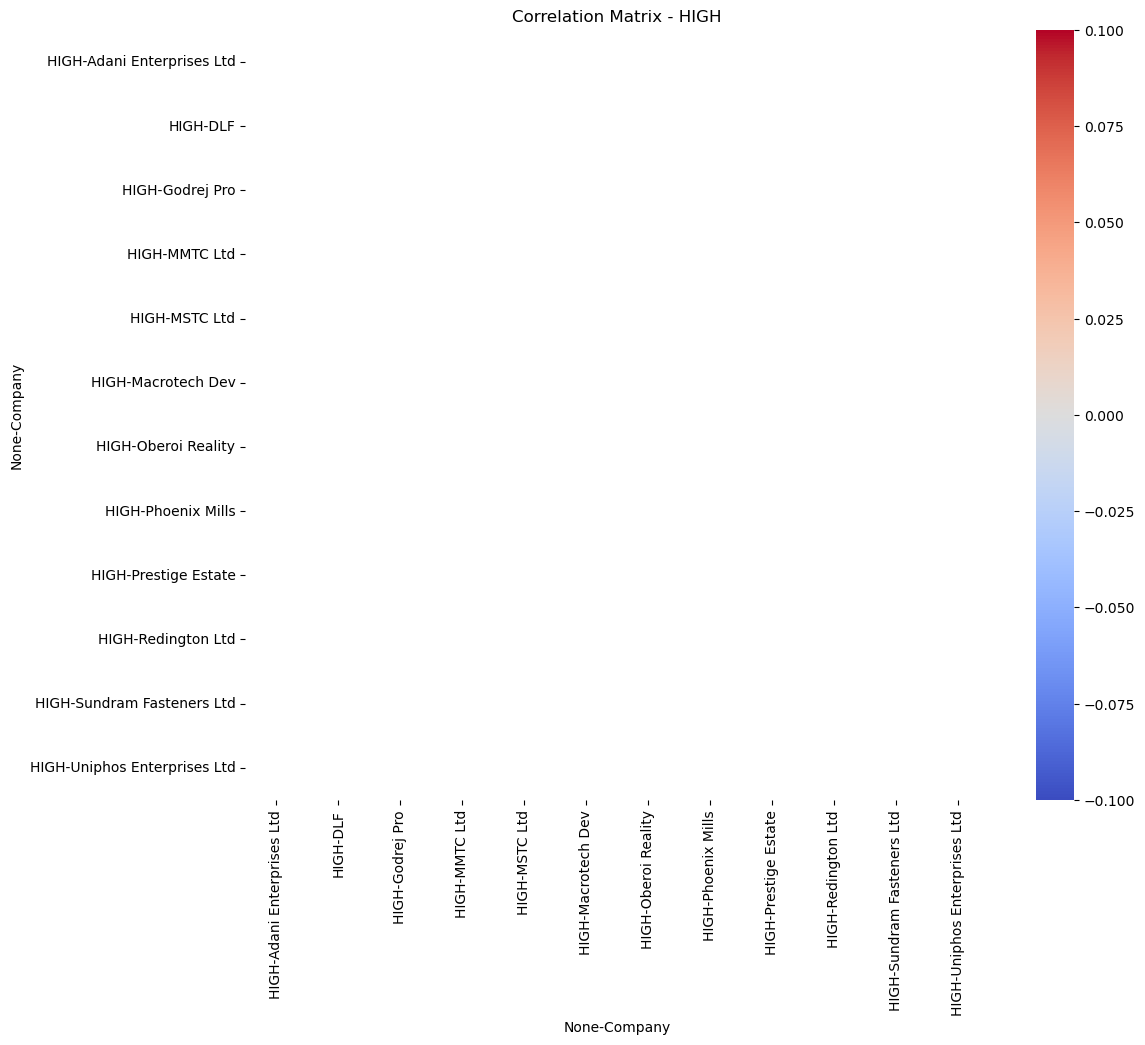

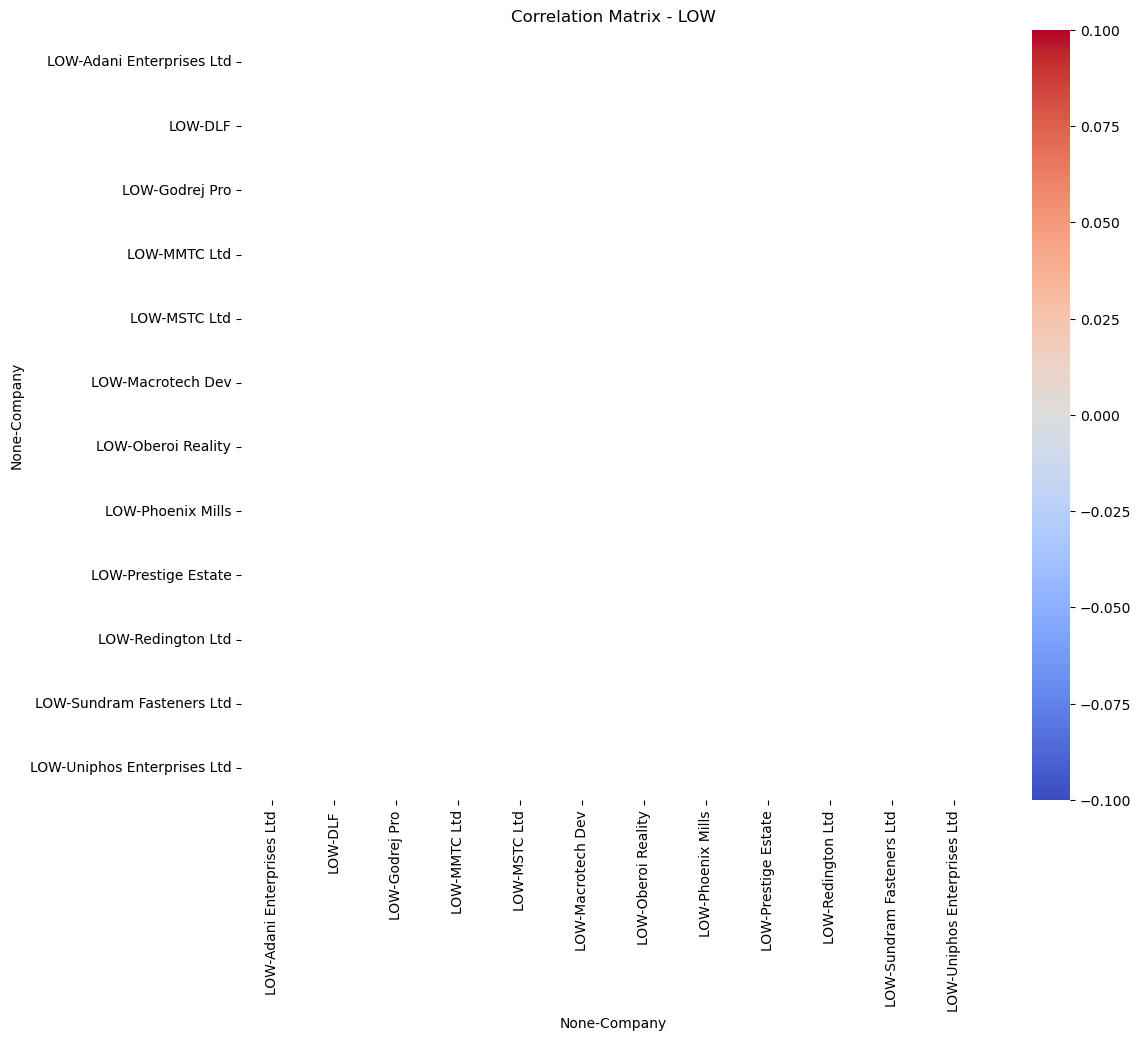

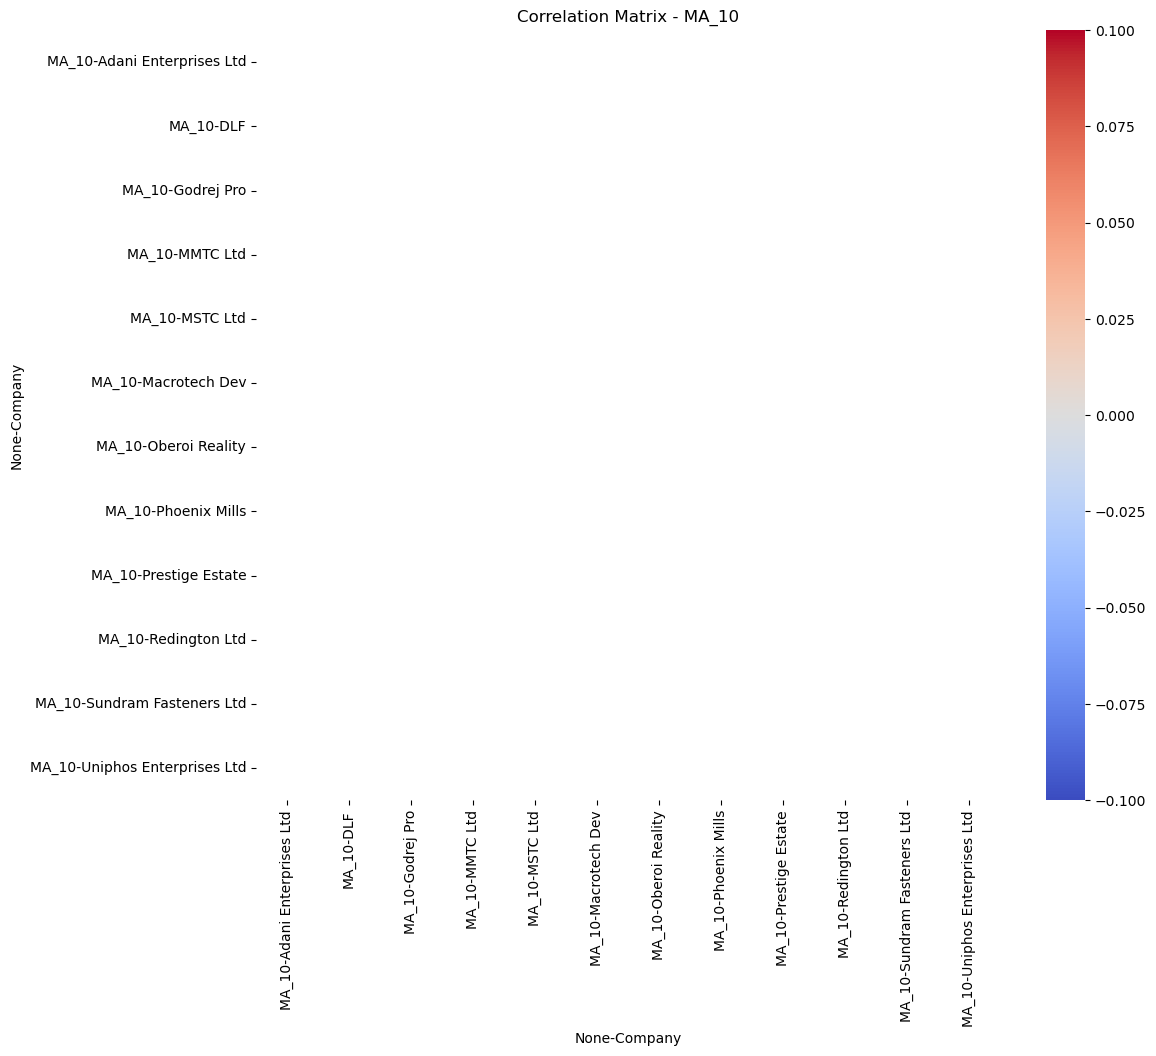

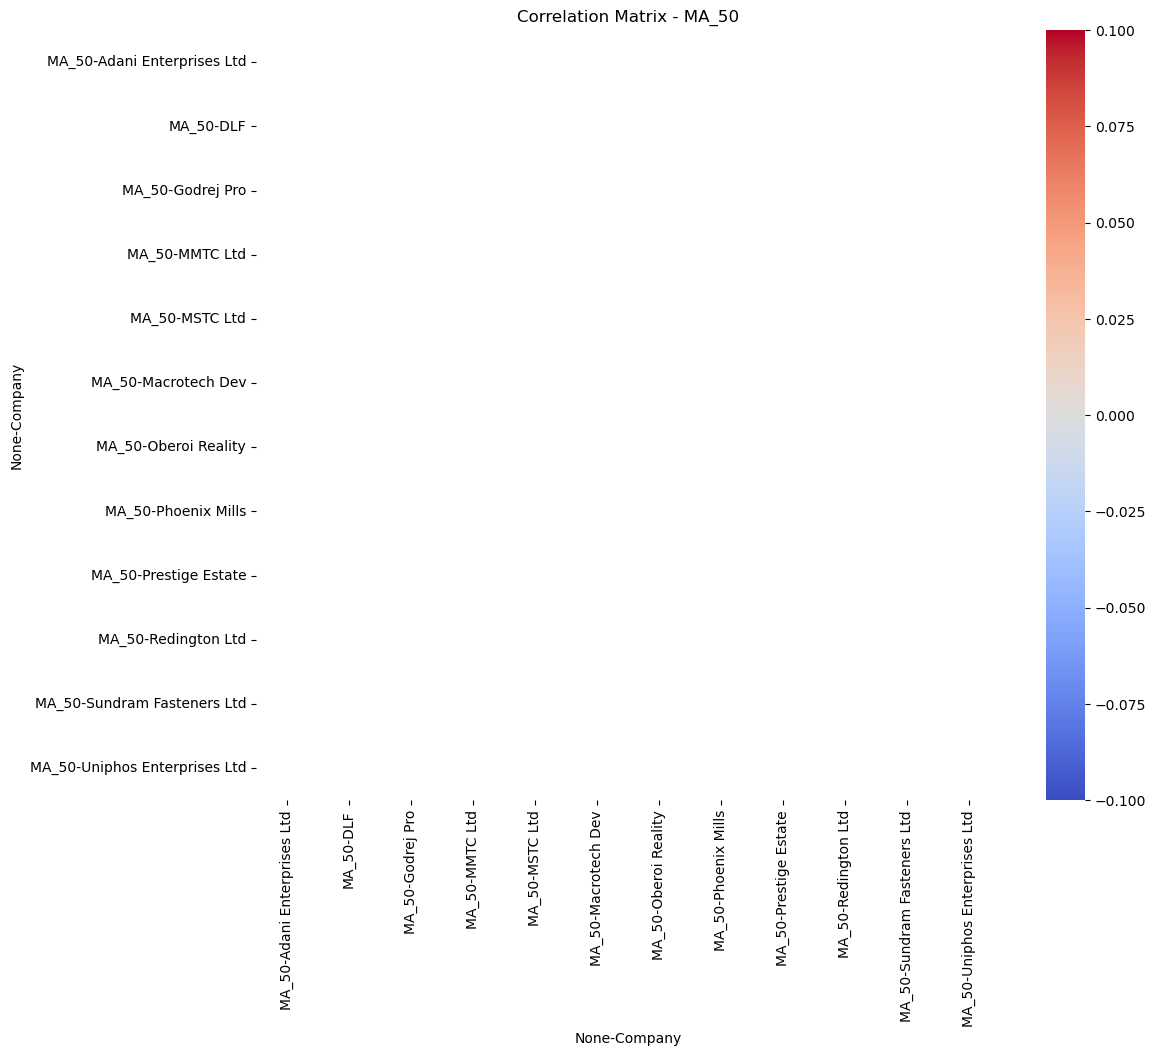

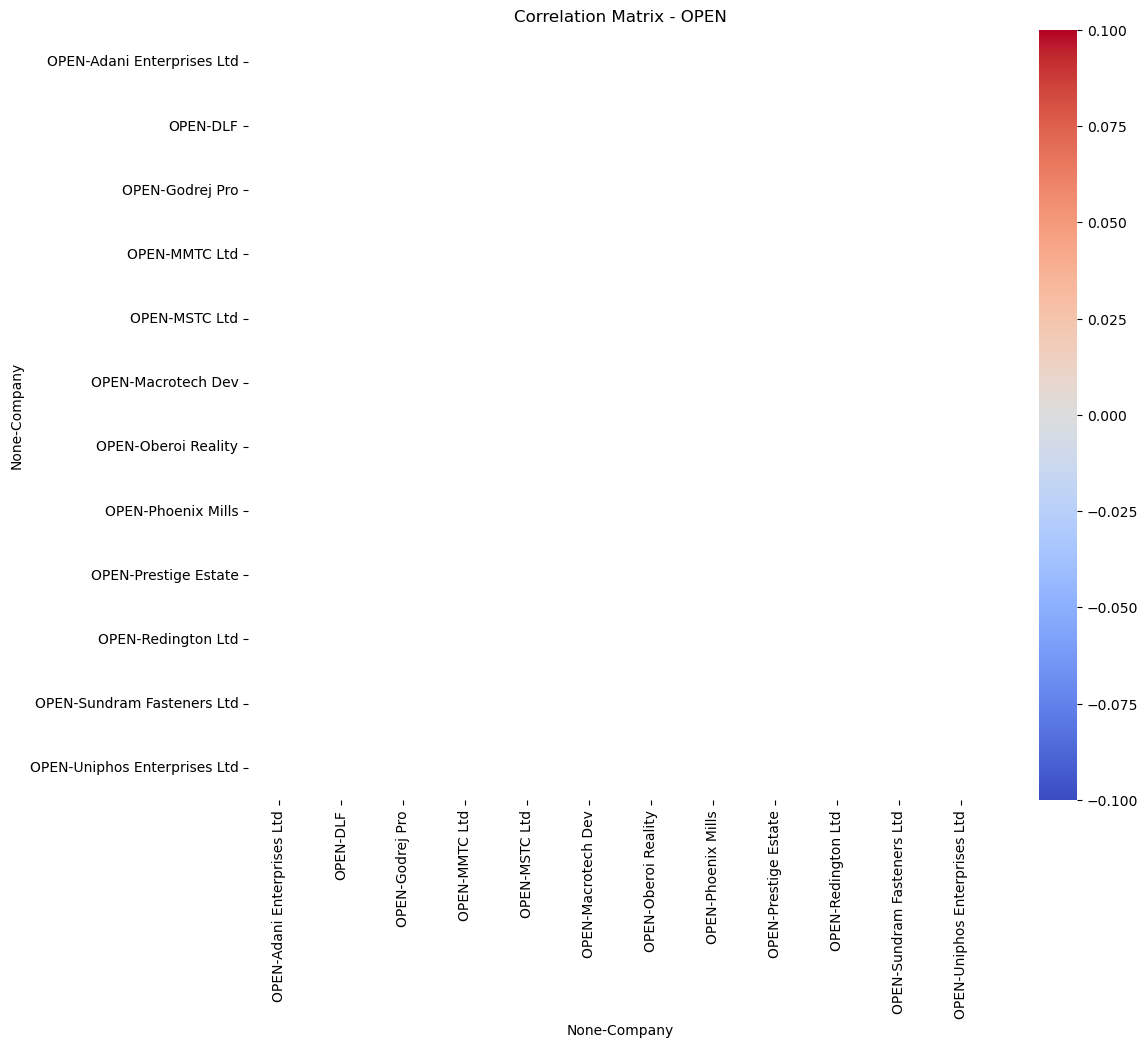

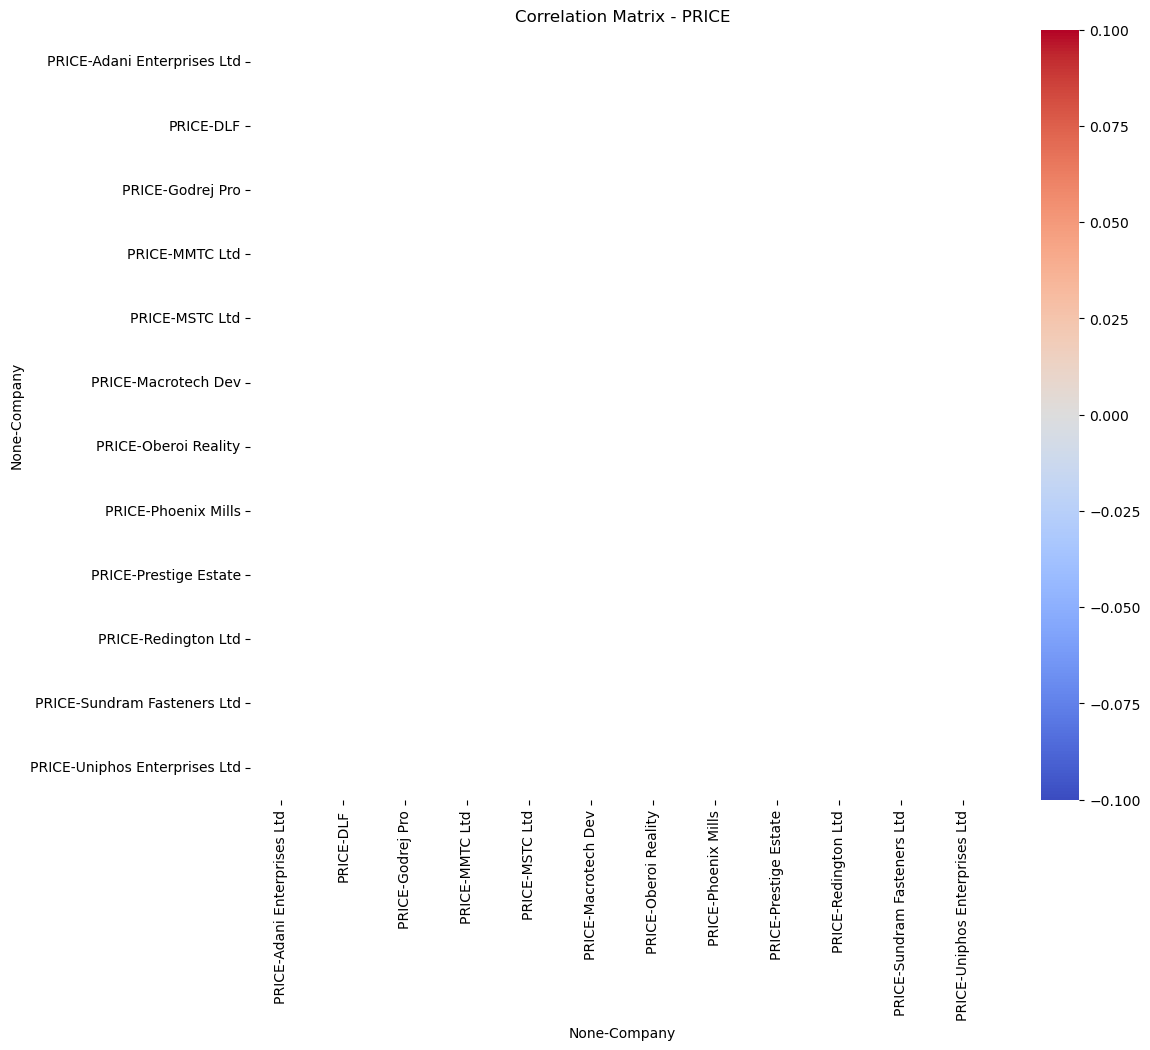

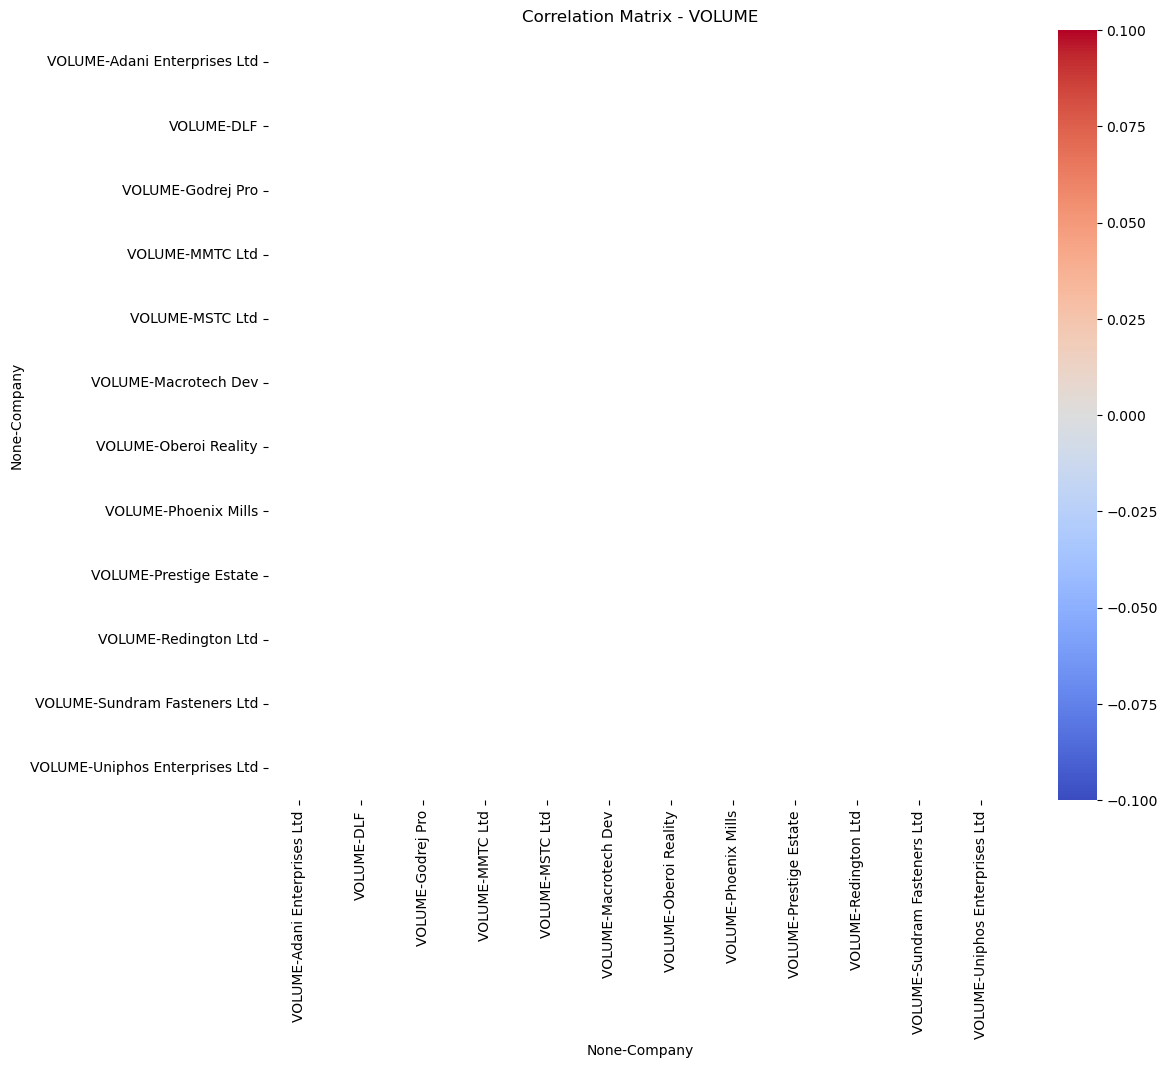

In [25]:

columns_of_interest = ['PRICE', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CHANGE(%)', 'Daily_Return', 'MA_10', 'MA_50', 'Category','Company']

# Select relevant columns from the DataFrame
df_subset = df2[columns_of_interest]

# Create a pivot table to separate the data by 'Category'
pivot_table = df_subset.pivot_table(index='Category', columns='Company', values=columns_of_interest[:-1], aggfunc='mean')

# Calculate correlation matrix for each 'Category'
correlation_matrices = {}
for category, data in pivot_table.groupby(level=0, axis=1):
    correlation_matrices[category] = data.corr()

# Plot correlation matrices
for category, matrix in correlation_matrices.items():
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix - {category}')
    plt.show()


In [26]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])

Laggards within Each Category:
                      Category                  Company  Cumulative_Return
Category                                                                  
Real Estate 1048   Real Estate                      DLF          -0.186714
Trading     13861      Trading  Uniphos Enterprises Ltd          -0.893942


In [27]:
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility,Cumulative_Return
8061,Trading,Adani Enterprises Ltd,Trading,2019-01-01,157.25,160.90,162.35,155.45,4726656,-0.0233,NaN,NaN,NaN,NaN,NaN
8038,Trading,Adani Enterprises Ltd,Trading,2019-01-02,143.00,136.95,144.80,134.55,7091209,0.0427,-0.090620,NaN,NaN,NaN,-0.090620
8018,Trading,Adani Enterprises Ltd,Trading,2019-01-03,133.85,130.35,135.20,128.85,7738116,0.0388,-0.063986,NaN,NaN,NaN,-0.154606
7999,Trading,Adani Enterprises Ltd,Trading,2019-01-04,151.45,147.45,153.20,145.10,7938713,0.0320,0.131490,NaN,NaN,NaN,-0.023116
7939,Trading,Adani Enterprises Ltd,Trading,2019-01-07,154.10,150.65,155.60,148.05,6182608,0.0239,0.017498,NaN,NaN,NaN,-0.005618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,Trading,Uniphos Enterprises Ltd,Trading,2023-12-14,155.60,156.45,158.00,155.00,12420,0.0042,0.004195,154.80,152.545000,0.016319,1.032267
12935,Trading,Uniphos Enterprises Ltd,Trading,2023-12-15,160.90,157.95,164.50,155.15,31211,0.0341,0.034062,155.69,152.825000,0.019090,1.066329
12934,Trading,Uniphos Enterprises Ltd,Trading,2023-12-18,163.50,162.50,169.35,161.85,27746,0.0162,0.016159,156.70,153.190000,0.019350,1.082488
12933,Trading,Uniphos Enterprises Ltd,Trading,2023-12-19,161.10,164.30,166.35,160.30,13669,-0.0147,-0.014679,157.22,153.483333,0.020084,1.067809


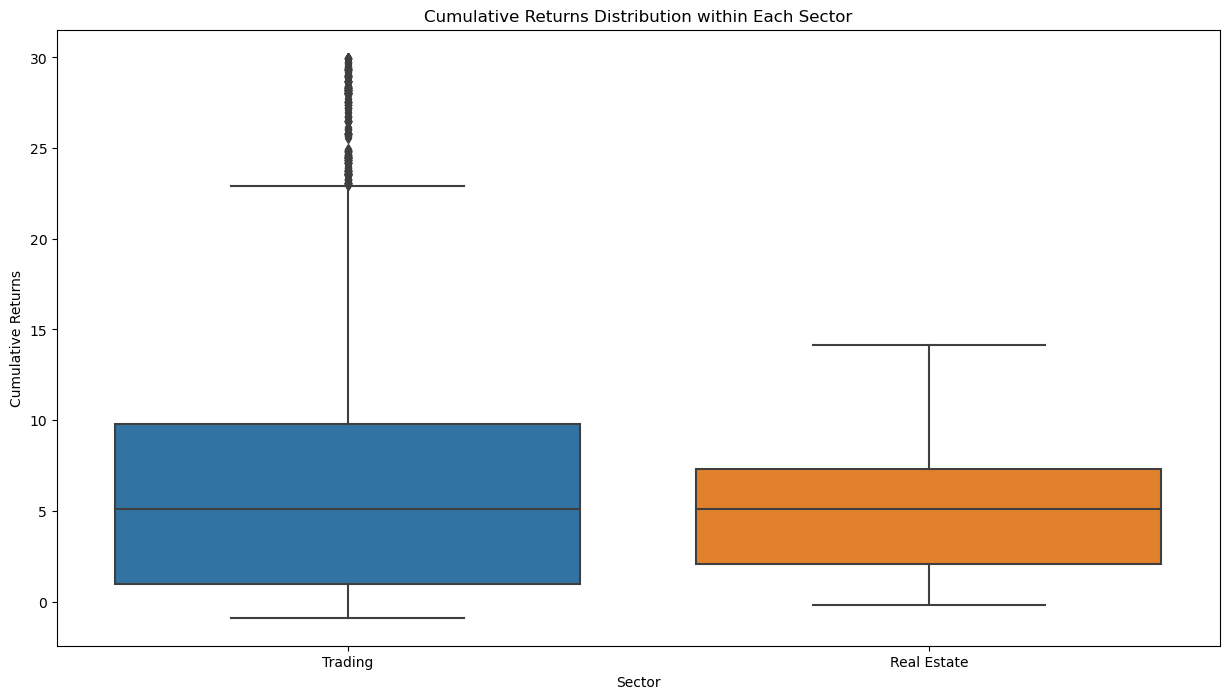

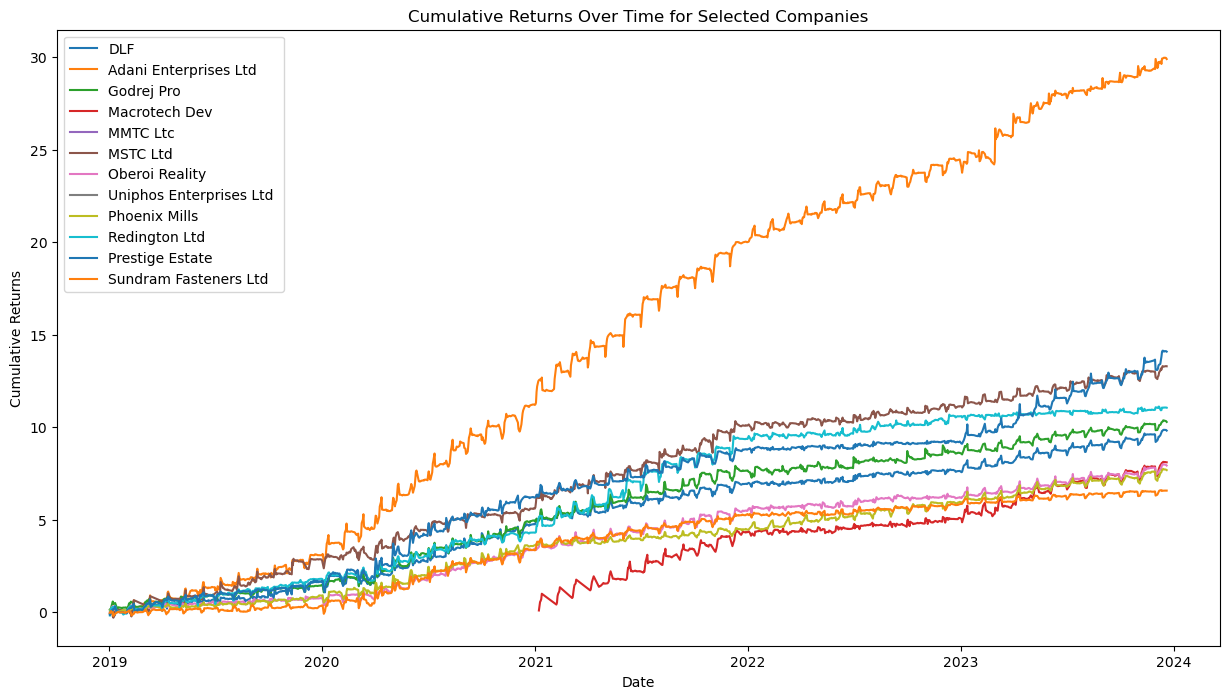

Statistical Summary of Cumulative Returns within Each Sector:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Real Estate,6823.0,4.964910,3.097736,-0.186714,2.049214,5.110374,7.303435,14.136622
Trading,7329.0,6.430904,6.629725,-0.893942,0.976411,5.073621,9.764960,29.981656


In [37]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Cumulative_Return', data=df2)
plt.title('Cumulative Returns Distribution within Each Sector')
plt.xlabel('Sector')
plt.ylabel('Cumulative Returns')
plt.show()

# Line chart to compare Cumulative Returns over time for select companies
selected_companies = ['DLF','Adani Enterprises Ltd','Godrej Pro','Macrotech Dev','MMTC Ltc','MSTC Ltd','Oberoi Reality','Uniphos Enterprises Ltd ','Phoenix Mills','Redington Ltd','Prestige Estate','Sundram Fasteners Ltd']
plt.figure(figsize=(15, 8))
for company in selected_companies:
    company_data = df2[df2['Company'] == company]
    plt.plot(company_data['DATE'], company_data['Cumulative_Return'], label=company)

plt.title('Cumulative Returns Over Time for Selected Companies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Statistical summary to compare mean, median, etc. of Cumulative Returns within each sector
summary_stats = df2.groupby('Category')['Cumulative_Return'].describe()
print("Statistical Summary of Cumulative Returns within Each Sector:")
summary_stats


In [29]:


# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Leaders within Each Category (Top 1)
leaders = df2.groupby('Category').apply(lambda x: x.nlargest(1, 'Cumulative_Return'))

# Display the results
print("Leaders within Each Category:")
print(leaders[['Category', 'Company', 'Cumulative_Return']])


Leaders within Each Category:
                     Category                Company  Cumulative_Return
Category                                                               
Real Estate 4368  Real Estate        Prestige Estate          14.136622
Trading     6832      Trading  Adani Enterprises Ltd          29.981656


In [30]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])


Laggards within Each Category:
                      Category                  Company  Cumulative_Return
Category                                                                  
Real Estate 1048   Real Estate                      DLF          -0.186714
Trading     13861      Trading  Uniphos Enterprises Ltd          -0.893942


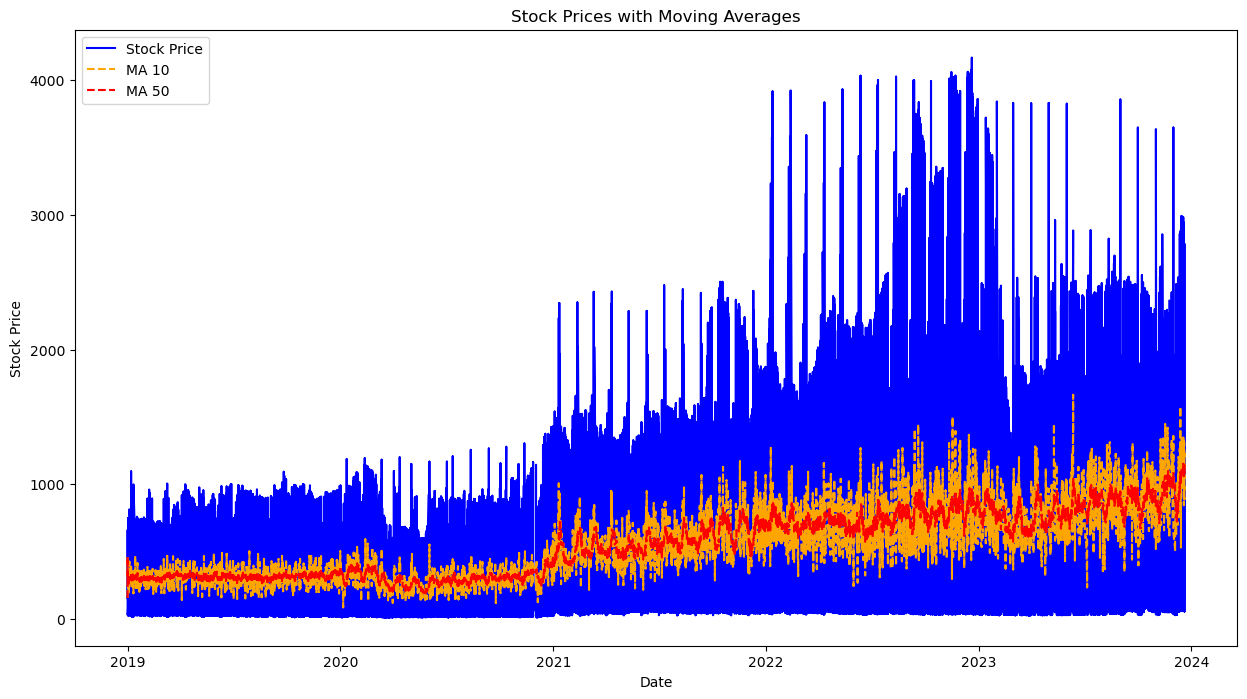

In [31]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2.sort_values(by='DATE')

# Calculate Simple Moving Averages (SMA) for 10 and 50 days
df2['MA_10'] = df2['PRICE'].rolling(window=10, min_periods=1).mean()
df2['MA_50'] = df2['PRICE'].rolling(window=50, min_periods=1).mean()

# Plot the stock prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(df2['DATE'], df2['PRICE'], label='Stock Price', color='blue')
plt.plot(df2['DATE'], df2['MA_10'], label='MA 10', linestyle='--', color='orange')
plt.plot(df2['DATE'], df2['MA_50'], label='MA 50', linestyle='--', color='red')

plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [33]:
df_niftyfifty = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Nifty 50')
df_niftyfifty 

,Nifty,Date,Price,Open,High,Low,Volume,Chg%
0,Nifty 50,2023-12-20,21150.15,21543.50,21593.00,21087.35,363.89,-0.0141
1,Nifty 50,2023-12-19,21453.10,21477.65,21505.05,21337.75,249.75,0.0016
2,Nifty 50,2023-12-18,21418.65,21434.80,21482.80,21365.35,249.67,-0.0018
3,Nifty 50,2023-12-15,21456.65,21287.45,21492.30,21235.30,508.76,0.0129
4,Nifty 50,2023-12-14,21182.70,21110.40,21210.90,21074.45,334.41,0.0123
...,...,...,...,...,...,...,...,...
1228,Nifty 50,2019-01-07,10771.80,10804.85,10835.95,10750.15,269.37,0.0041
1229,Nifty 50,2019-01-04,10727.35,10699.70,10741.05,10628.65,296.60,0.0052
1230,Nifty 50,2019-01-03,10672.25,10796.80,10814.05,10661.25,286.24,-0.0111
1231,Nifty 50,2019-01-02,10792.50,10868.85,10895.35,10735.05,309.67,-0.0108


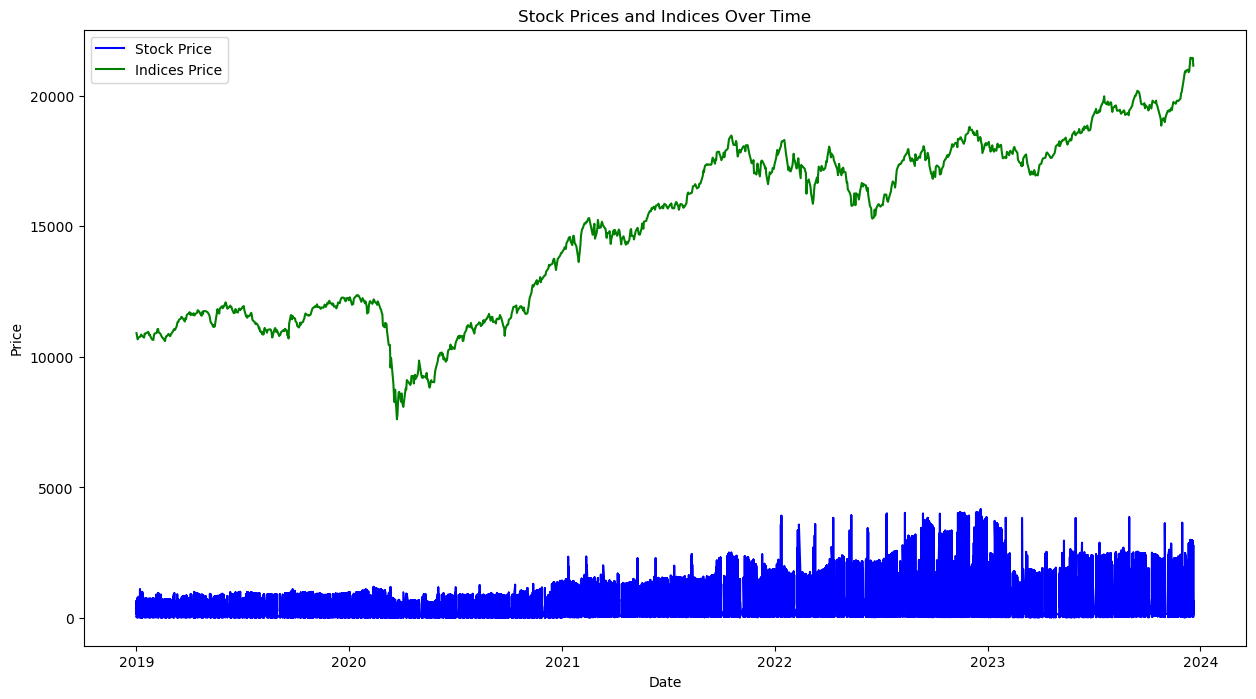

In [34]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df_niftyfifty['DATE'] = pd.to_datetime(df_niftyfifty['Date'])

# Merge the two DataFrames based on the 'DATE' column
merged_df = pd.merge(df2, df_niftyfifty, on='DATE', how='inner', suffixes=('_stock', '_indices'))

# Plot stock prices and indices over time
plt.figure(figsize=(15, 8))
plt.plot(merged_df['DATE'], merged_df['PRICE'], label='Stock Price', color='blue')
plt.plot(merged_df['DATE'], merged_df['Price'], label='Indices Price', color='green')

plt.title('Stock Prices and Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Company
Adani Enterprises Ltd      0.208260
DLF                        0.117660
Godrej Pro                 0.124378
MMTC Ltd                   0.150669
MSTC Ltd                   0.147664
Macrotech Dev              0.137871
Oberoi Reality             0.103229
Phoenix Mills              0.099267
Prestige Estate            0.140878
Redington Ltd              0.123379
Sundram Fasteners Ltd      0.094406
Uniphos Enterprises Ltd    0.030057
Name: Daily_Return, dtype: float64


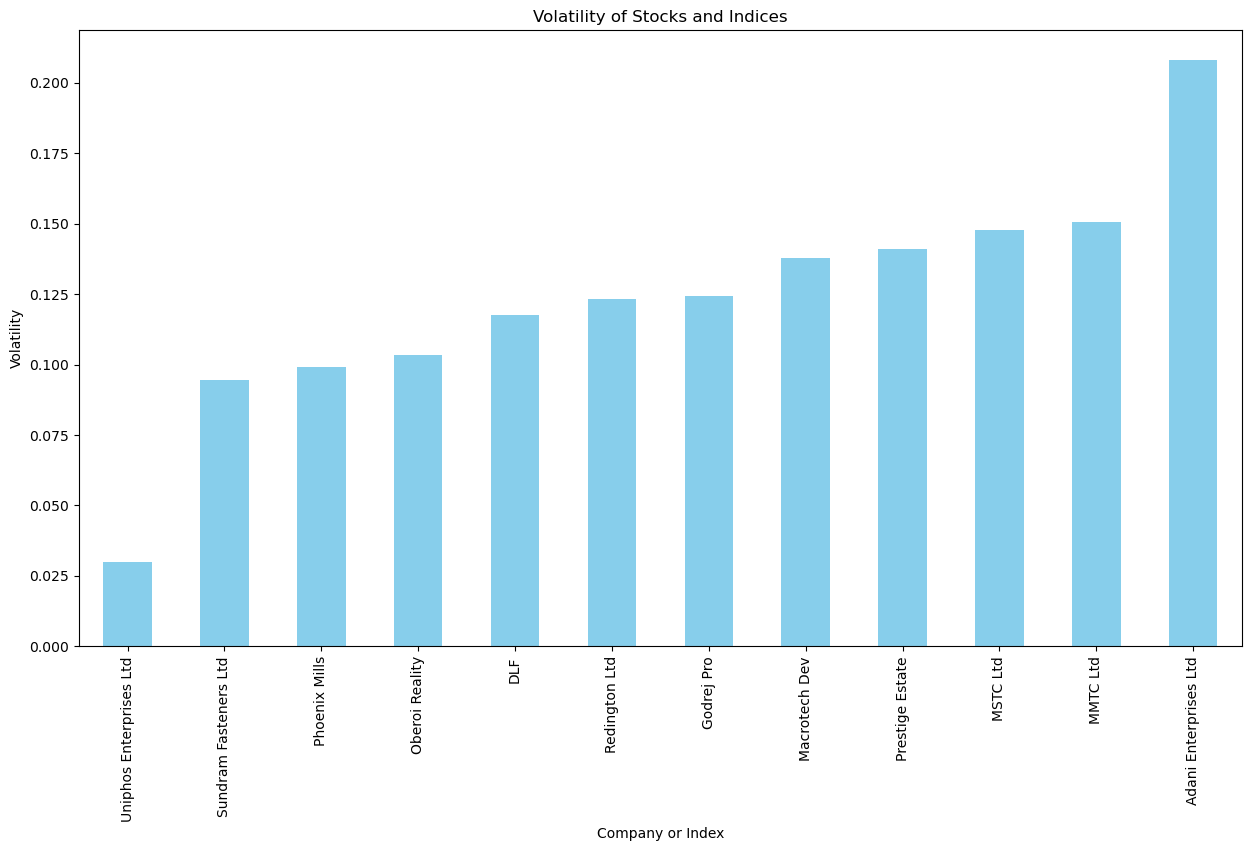

In [35]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Analyze volatility
print(volatility_df)

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')
plt.show()


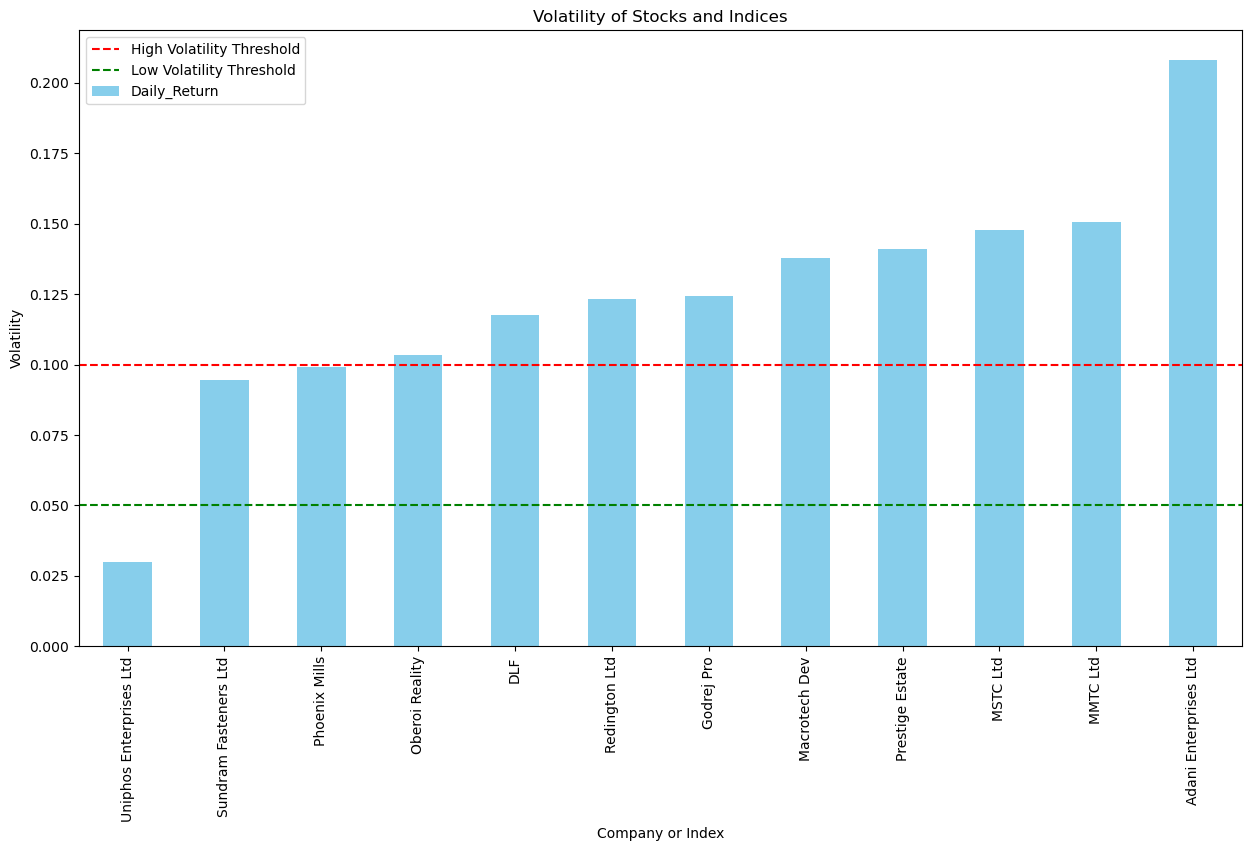

High Volatility Periods: Index(['Adani Enterprises Ltd', 'DLF', 'Godrej Pro', 'MMTC Ltd', 'MSTC Ltd',
       'Macrotech Dev', 'Oberoi Reality', 'Prestige Estate', 'Redington Ltd'],
      dtype='object', name='Company')
Low Volatility Periods: Index(['Uniphos Enterprises Ltd'], dtype='object', name='Company')


In [36]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Set thresholds for high and low volatility
high_volatility_threshold = 0.1  # Adjust the threshold based on your data
low_volatility_threshold = 0.05  # Adjust the threshold based on your data

# Identify periods of high and low volatility
high_volatility_periods = volatility_df[volatility_df > high_volatility_threshold].index
low_volatility_periods = volatility_df[volatility_df < low_volatility_threshold].index

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')

# Highlight high and low volatility periods
plt.axhline(y=high_volatility_threshold, color='red', linestyle='--', label='High Volatility Threshold')
plt.axhline(y=low_volatility_threshold, color='green', linestyle='--', label='Low Volatility Threshold')

plt.legend()
plt.show()

# Print periods of high and low volatility
print(f'High Volatility Periods: {high_volatility_periods}')
print(f'Low Volatility Periods: {low_volatility_periods}')
